In [72]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def model_linear(x,w): #Model
    y=w[1]*x+w[0] #Linear Predictor
    return y

def loss_MSE(y,t):
    N=np.shape(y)[0] #Number of samples
    loss=np.sum(np.square(t-y))/N
    return loss

def grad_MSE_linear(x,y,t):
    x1=np.vstack((np.ones_like(x),x))
    e=(t.flatten()-y)
    N=np.shape(x)[0] #Number of samples
    
    grad=-1.0/N * x1.dot(e)
    return grad

0.7755309731648375


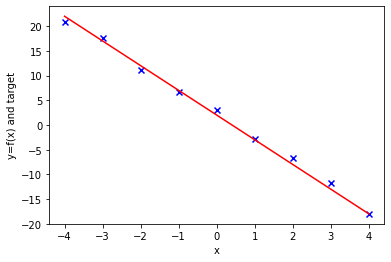

In [73]:
#Cook up Data
x=np.array([-4,-3,-2,-1,0,1,2,3,4]) #Inputs
w_ideal=np.array([2.0,-5.0]) #Actual bias and weight
t=w_ideal[1]*x + w_ideal[0] + 0.9*np.random.randn(np.size(x)) #Adding some noise

#Try the ideal weights and plot data
w=w_ideal #Some estimated weights
y=model_linear(x,w) #Model

#Plot data
plt.scatter(x,t,c='b',marker='x')
plt.plot(x,y,c='r')
plt.xlabel('x')
plt.ylabel('y=f(x) and target')

#Check the loss with ideal weights. It should be low, if the noise is
loss=loss_MSE(y,t)
print(loss)

782.6450268101938


Text(0, 0.5, 'y=f(x) and target')

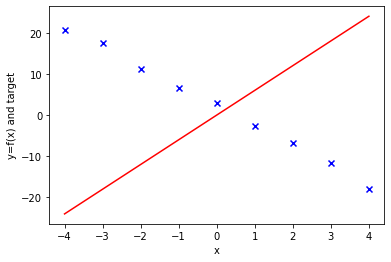

In [74]:
w=np.array([0.0,6.0]) #Random Initialization of weights
learning_rate=0.05 #How fast will the learning converge
iterations=0 #Set iteration counter

#Check plot and loss
y=model_linear(x,w) #Model

loss=loss_MSE(y,t)
print(loss)

plt.scatter(x,t,c='b',marker='x')
plt.plot(x,y,c='r')
plt.xlabel('x')
plt.ylabel('y=f(x) and target')

[0.11114783 2.40080833]


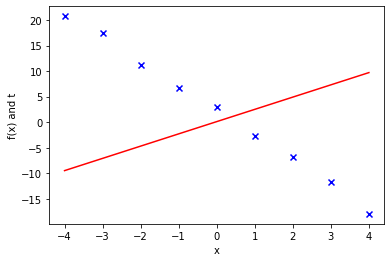

In [75]:
#Performing one iteration of Gradient Descent
iterations +=1

grad=grad_MSE_linear(x,y,t) #Computer gradient
delta_w= -learning_rate * grad #Update weight and bias
w+=delta_w #Update weight and bias

#Plot data
y=model_linear(x,w) #Computer current output
plt.scatter(x,t,c='b',marker='x')
plt.plot(x,y,c='r')
plt.xlabel('x')
plt.ylabel('f(x) and t')

print(w)

[2, array([0.21673826, 0.00134721]), 158.00859120681983]
[3, array([ 0.31704918, -1.59829353]), 72.32114533670091]
[4, array([ 0.41234455, -2.6647207 ]), 34.05808182354569]
[5, array([ 0.50287515, -3.37567214]), 16.890047618312927]
[6, array([ 0.58887922, -3.84963976]), 9.113399243819178]
[7, array([ 0.67058308, -4.16561818]), 5.524975195051367]
[8, array([ 0.74820175, -4.37627046]), 3.810867428466335]
[9, array([ 0.82193949, -4.51670532]), 2.941416252424638]
[10, array([ 0.89199035, -4.61032855]), 2.457861491958694]
[11, array([ 0.95853866, -4.67274404]), 2.155286621043375]
[12, array([ 1.02175955, -4.71435437]), 1.9416942668890522]
[13, array([ 1.0818194 , -4.74209458]), 1.7753633747522202]
[14, array([ 1.13887626, -4.76058806]), 1.6369991701487068]
[15, array([ 1.19308027, -4.77291705]), 1.517347442405136]
[16, array([ 1.24457409, -4.78113637]), 1.4116826322992733]
[17, array([ 1.29349321, -4.78661592]), 1.3173516408154926]
[18, array([ 1.33996638, -4.79026895]), 1.2326763652843868]

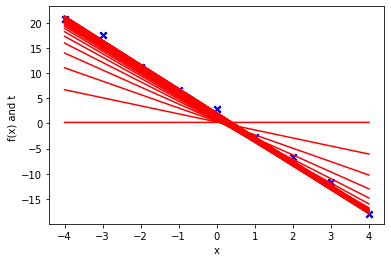

In [76]:
#Perform gradient descent in a loop

max_iter=100 #Max iterations allowed
min_abs_change=0.005 #Minimum change in weights allowed

while True:
    
    iterations +=1 #Update iteration number
    
    grad=grad_MSE_linear(x,y,t) #Compute gradient
    delta_w=-learning_rate*grad #Update weight and bias
    
    #Stopping condition
    if np.sum(abs(delta_w)) < min_abs_change:
        break
    if iterations > max_iter:
        break
        
    w+=delta_w #Update weights
    
    #Plot Data
    y=model_linear(x,w) #Compute current output
    plt.scatter(x,t,c='b',marker='x')
    plt.plot(x,y,c='r')
    plt.xlabel('x')
    plt.ylabel('f(x) and t ')
    
    print([iterations,w,loss_MSE(y,t)])

In [77]:
import numpy as np

def model_logistic(x,w): # Model
    y = w[1]*x + w[0] # Linear predictor
    y = 1 / (1 + np.exp(-y)) # logistic
    return y

def loss_CE(y,t):    
    N = np.shape(y)[0] # number of samples    
    loss = - np.sum( t * np.log(y) + (1-t) * np.log(1-y) ) / N # Cross entropy
    return loss

def grad_CE_logistic(x,y,t):
    x1 = np.vstack((np.ones_like(x), x))
    N = np.shape(y)[0] # number of samples        
    grad = (1.0/len(x)) * np.dot( x1 , y - t ) / N # Gradient of cross entropy
    return grad

0.3499403129530789


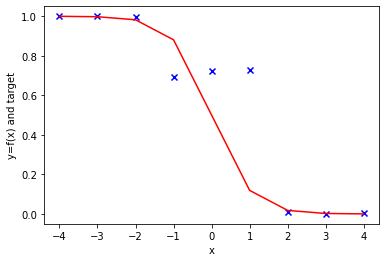

In [78]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]) # Inputs
w_ideal = np.array([0, -2.0]) # Actual bias and weight
t = w_ideal[1]*x + w_ideal[0] + 2*np.random.randn(np.size(x)) # Adding some noise to desired output
t = 1 / (1 + np.exp(-t))

# TRY THE IDEAL WEIGHTS AND PLOT DATA
w = w_ideal # Some estimated weights.
y = model_logistic(x,w) # Model

# Plot data
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")


# CHECK THE LOSS WITH IDEAL WEIGHTS. IT SHOULD BE LOW, IF THE NOISE IS LOW.
loss = loss_CE(y,t)
print(loss)

12.690721980535866


Text(0, 0.5, 'y=f(x) and target')

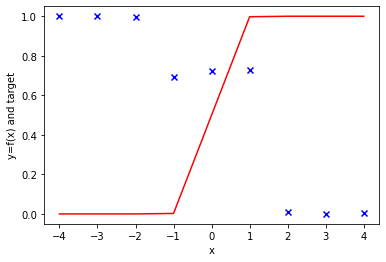

In [79]:
# INITIALIZE SOME WEIGHTS AND TRAINING HYPERPARAMETERS

w = np.array([0.0, 6.0]) # RANDOM INITIALIZATION OF WEIGHTS
learning_rate = 3 # HOW FAST WILL THE LEARNING CONVERGE
iterations = 0 # SET ITERATION COUNTER

# CHECK PLOT AND LOSS
y = model_logistic(x,w) # Model 

loss = loss_CE(y,t)
print(loss)

plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

[0.023848   5.29945329]


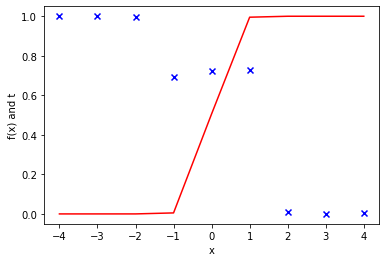

In [80]:
# PERFORM ONE ITERATION OF GRADIENT DESCENT USING MSE LOSS

iterations += 1 # Update iteration number

grad = grad_CE_logistic(x,y,t) # Compute gradient
delta_w = -learning_rate * grad # Update weight and bias
w += delta_w # Update weight and bias

# Plot data
y = model_logistic(x,w) # Compute current output
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("f(x) and t")

print(w)

[2, array([0.04746641, 4.59909444]), 9.744082692601395]
[3, array([0.07083994, 3.89911753]), 8.27327428384919]
[4, array([0.09392788, 3.19992398]), 6.806577048227749]
[5, array([0.11663264, 2.50236872]), 5.348546372585121]
[6, array([0.13873425, 1.80840437]), 3.910055926878748]
[7, array([0.15974019, 1.1232777 ]), 2.5230802326349266]
[8, array([0.17838489, 0.4659086 ]), 1.3098082422029416]
[9, array([ 0.19114776, -0.07956474]), 0.6103886528069207]
[10, array([ 0.19927912, -0.36638687]), 0.4251300906824878]
[11, array([ 0.20948413, -0.51717447]), 0.36864367924432995]
[12, array([ 0.22098945, -0.61713083]), 0.3422920750484689]
[13, array([ 0.23311856, -0.69114406]), 0.3272140577724565]
[14, array([ 0.24553073, -0.74936158]), 0.3175335938867207]
[15, array([ 0.25803905, -0.79692166]), 0.3108368928769678]
[16, array([ 0.27053218, -0.8367969 ]), 0.3059526836362203]
[17, array([ 0.28293975, -0.8708679 ]), 0.3022456762248183]
[18, array([ 0.2952154 , -0.90040317]), 0.29934264584486353]
[19, a

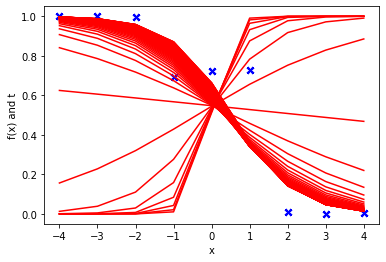

In [81]:
# Perform gradient descent in a loop

max_iter = 100 # Maximum iterations allowed
min_abs_change = 0.005 # Minimum change in weights allowed

while True:
    
    iterations += 1 # Update iteration number

    grad = grad_CE_logistic(x,y,t) # Compute gradient
    delta_w = -learning_rate * grad # Update weight and bias

    # Stopping Condition
    if np.sum(abs(delta_w)) < min_abs_change:
        break
    if iterations > max_iter:
        break

    w += delta_w # update weights

    # Plot data
    y = model_logistic(x,w) # Compute current output
    plt.scatter(x, t, c="b", marker='x')
    plt.plot(x, y, c="r")
    plt.xlabel("x")
    plt.ylabel("f(x) and t")

    print([iterations,w,loss_CE(y,t)])